## The original image, and its associated caption (decoded from token IDs).

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))



In [2]:
import torch
import matplotlib.pyplot as plt
import random
import torchvision.transforms.functional as F
from src.dataset import ImageCaptionDataset, my_transforms, build_vocab_from_captions, MyTokenizer

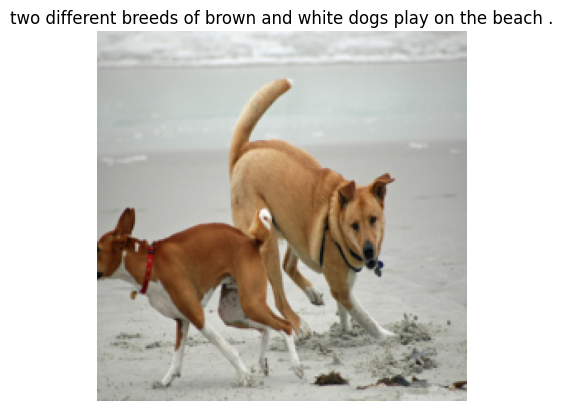

In [3]:


# Build vocab and dataset
import os
BASE_DIR = os.path.abspath("..")
CSV_PATH = os.path.join(BASE_DIR, "data", "Captions", "captions.txt")
IMG_PATH = os.path.join(BASE_DIR, "data", "Images")

vocab = build_vocab_from_captions(CSV_PATH)
my_tokenizer = MyTokenizer(vocab)
dataset = ImageCaptionDataset(
    csv_file=CSV_PATH,
    img_folder=IMG_PATH,
    tokenizer=my_tokenizer,
    transform=my_transforms
)


# Reverse vocab for decoding ids back to words
idx2word = {idx: word for word, idx in vocab['word2idx'].items()}

def decode_caption(caption_tensor):
    tokens = []
    for idx in caption_tensor:
        word = idx2word.get(idx.item(), "<unk>")
        if word == '<eos>':
            break
        if word != '<sos>' and word != '<pad>':
            tokens.append(word)
    return ' '.join(tokens)

# Pick an index
idx = 100  # or any random number in range(len(dataset))
image, caption_tensor = dataset[idx]

# Denormalize for displaying
mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
image_display = image * std + mean  # unnormalize
image_display = F.to_pil_image(image_display)

# Show image and caption
plt.imshow(image_display)
plt.axis('off')
plt.title(decode_caption(caption_tensor))
plt.show()


### Grid of random samples

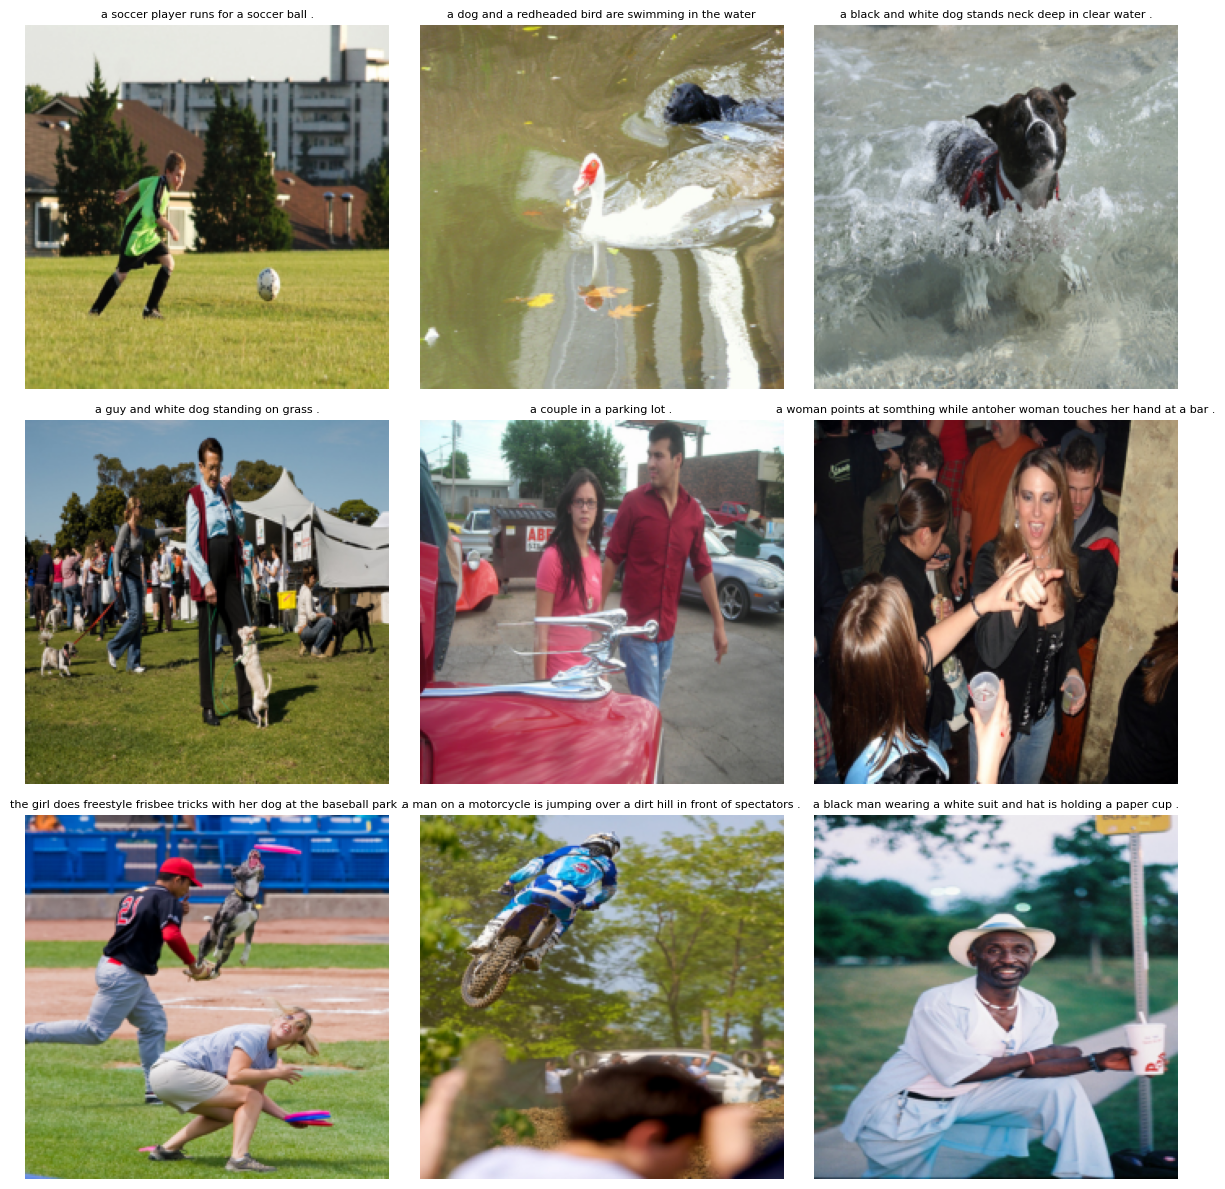

In [4]:
plt.figure(figsize=(12,12))
for i in range(9):
    idx = random.randint(0, len(dataset) - 1)
    image, caption_tensor = dataset[idx]
    image_display = image * std + mean
    image_display = F.to_pil_image(image_display)
    plt.subplot(3,3,i+1)
    plt.imshow(image_display)
    plt.axis('off')
    plt.title(decode_caption(caption_tensor), fontsize=8)
plt.tight_layout()
plt.show()


###  Plot  token frequency (EDA on vocab)

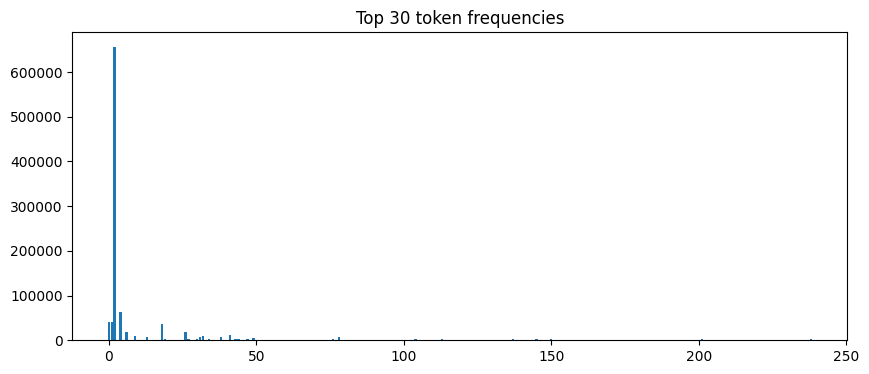

In [5]:
import collections
import matplotlib.pyplot as plt

counter = collections.Counter()
for idx in range(len(dataset)):
    _, caption_tensor = dataset[idx]
    for token_id in caption_tensor:
        counter[token_id.item()] += 1

plt.figure(figsize=(10,4))
plt.bar(*zip(*counter.most_common(30)))
plt.title("Top 30 token frequencies")
plt.show()


Text(0.5, 1.0, 'a girl dressed in black and white with mime makeup stands in the middle of a street with a white umbrella and black top hat in her hand')

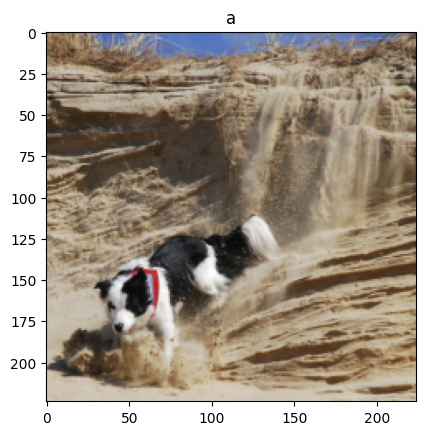

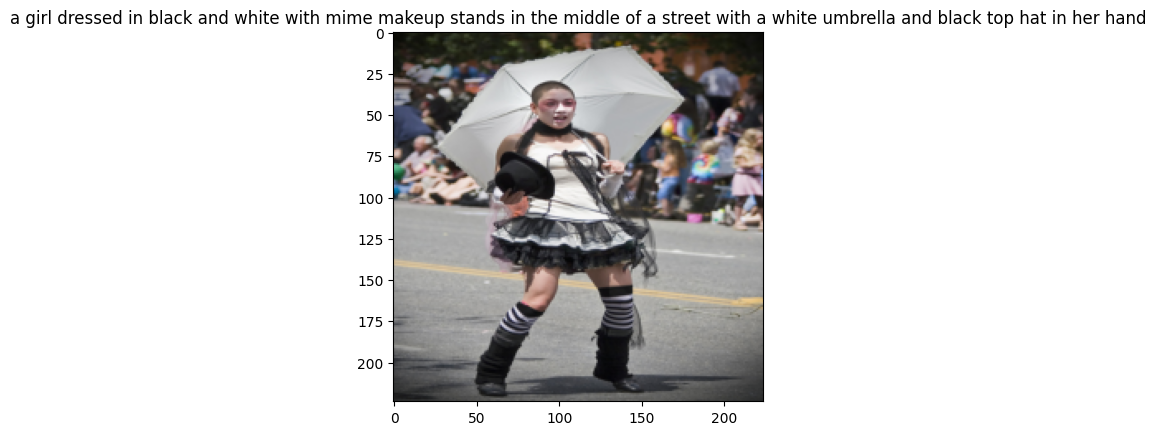

In [6]:
lengths = [ (idx, (caption_tensor != 2).sum().item()) for idx, (image, caption_tensor) in enumerate(dataset)]
lengths.sort(key=lambda x: x[1])

# shortest caption
short_idx, _ = lengths[0]
image, cap = dataset[short_idx]
plt.imshow(F.to_pil_image(image * std + mean))
plt.title(decode_caption(cap))

# longest caption
long_idx, _ = lengths[-1]
image, cap = dataset[long_idx]
plt.figure()
plt.imshow(F.to_pil_image(image * std + mean))
plt.title(decode_caption(cap))



## Implementing training loop 

In [7]:

import sys
sys.path.append('../src')  # adjust path if needed


In [ ]:
import importlib
import sys

# Remove cached modules
modules_to_reload = ['src.models', 'src.train', 'src.dataset', 'src.utils', 'models', 'train', 'dataset']
for module in modules_to_reload:
    if module in sys.modules:
        del sys.modules[module]

# Enable autoreload for future changes
%reload_ext autoreload
%autoreload 2

In [9]:
from train import train_model

In [ ]:
# Fresh imports after module reload
from models import ImageCaptioningModel
from dataset import ImageCaptionDataset, my_transforms, build_vocab_from_captions, MyTokenizer
from train import train_model

print("✅ Modules imported successfully with updated signatures")

In [11]:
sys.path.append('../data')  # adjust path if needed

In [12]:
train_model(
    csv_path='../data/Captions/captions.txt',
    image_folder='../data/Images',
    epochs=10,
    batch_size=32,
    lr=1e-4,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    checkpoint_path='checkpoints/best_model.pt'
)

c:\Users\Lenovo\Desktop\image-captioning-transformer\imageenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lenovo\Desktop\image-captioning-transformer\imageenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Lenovo/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:24<00:00, 4.11MB/s]
Epoch 1/10: 100%|██████████| 1265/1265 [08:01<00:00,  2.63it/s]


Epoch 1, Loss: 3.9961
✅ Saved best model with loss 3.9961 at checkpoints/best_model.pt


Epoch 2/10: 100%|██████████| 1265/1265 [11:02<00:00,  1.91it/s] 


Epoch 2, Loss: 3.1033
✅ Saved best model with loss 3.1033 at checkpoints/best_model.pt


Epoch 3/10: 100%|██████████| 1265/1265 [17:40<00:00,  1.19it/s]


Epoch 3, Loss: 2.7845
✅ Saved best model with loss 2.7845 at checkpoints/best_model.pt


Epoch 4/10: 100%|██████████| 1265/1265 [20:35<00:00,  1.02it/s]


Epoch 4, Loss: 2.5696
✅ Saved best model with loss 2.5696 at checkpoints/best_model.pt


Epoch 5/10: 100%|██████████| 1265/1265 [1:30:51<00:00,  4.31s/it]     


Epoch 5, Loss: 2.4009
✅ Saved best model with loss 2.4009 at checkpoints/best_model.pt


Epoch 6/10: 100%|██████████| 1265/1265 [15:48<00:00,  1.33it/s]


Epoch 6, Loss: 2.2605
✅ Saved best model with loss 2.2605 at checkpoints/best_model.pt


Epoch 7/10: 100%|██████████| 1265/1265 [15:37<00:00,  1.35it/s]


Epoch 7, Loss: 2.1352
✅ Saved best model with loss 2.1352 at checkpoints/best_model.pt


Epoch 8/10: 100%|██████████| 1265/1265 [13:26<00:00,  1.57it/s]


Epoch 8, Loss: 2.0223
✅ Saved best model with loss 2.0223 at checkpoints/best_model.pt


Epoch 9/10: 100%|██████████| 1265/1265 [08:45<00:00,  2.41it/s]


Epoch 9, Loss: 1.9206
✅ Saved best model with loss 1.9206 at checkpoints/best_model.pt


Epoch 10/10: 100%|██████████| 1265/1265 [10:27<00:00,  2.02it/s]


Epoch 10, Loss: 1.8242
✅ Saved best model with loss 1.8242 at checkpoints/best_model.pt
Training complete ✅


In [14]:
import os

# Check if file is found
print(os.getcwd())  # Shows your current working directory
print(os.path.exists('data/Captions/captions.txt'))  # Should return True
print(os.path.exists('../data/Captions/captions.txt'))  # Try this too


c:\Users\Lenovo\Desktop\image-captioning-transformer\notebooks
False
True


In [16]:
import pickle
# Save the vocabulary to a file
with open('vocab.pkl', 'wb') as f:
    pickle.dump(vocab, f)

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = ImageCaptioningModel(
    vocab_size=len(vocab['word2idx']),
    embed_dim=256,
    num_heads=8,
    num_layers=3,
    max_len=30
).to(device)

model.load_state_dict(torch.load("../checkpoints/best_model.pt", map_location=device))
model.eval()

ImageCaptioningModel(
  (encoder_cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
         

In [25]:
from PIL import Image

def generate_caption(image_path, model, vocab, device, max_length=30):
    """Generate caption for an image using existing transforms"""
    # Use the same transforms from dataset.py
    image = Image.open(image_path).convert("RGB")
    image = my_transforms(image).unsqueeze(0).to(device)  # Use your existing my_transforms
    
    model.eval()
    
    # Get word2idx and idx2word mappings
    word2idx = vocab['word2idx']
    idx2word = {idx: word for word, idx in word2idx.items()}
    
    # Start with <sos> token
    caption_ids = [word2idx['<sos>']]
    
    with torch.no_grad():
        for _ in range(max_length):
            # Convert current caption to tensor
            current_caption = torch.tensor(caption_ids).unsqueeze(0).to(device)
            
            # Get model output
            outputs = model(image, current_caption)
            
            # Get the last predicted token
            next_token_logits = outputs[0, -1, :]
            next_token_id = torch.argmax(next_token_logits).item()
            
            # Add to caption
            caption_ids.append(next_token_id)
            
            # Stop if we hit <eos> token
            if next_token_id == word2idx.get('<eos>', -1):
                break
    
    # Convert IDs to words (skip <sos> and <eos>)
    words = []
    for idx in caption_ids[1:]:  # Skip <sos>
        word = idx2word.get(idx, '<unk>')
        if word == '<eos>':
            break
        if word not in ['<pad>', '<sos>']:
            words.append(word)
    
    return ' '.join(words)

Generated Caption: a brown dog with a red collar stands in the grass .


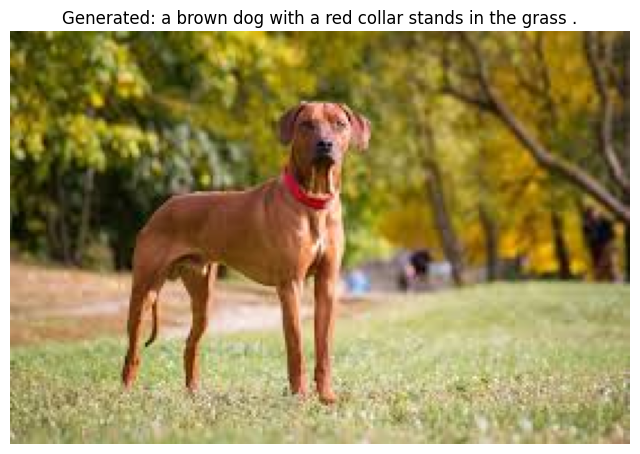

In [26]:
try:
    caption = generate_caption("../test_image/dog_test.jpg", model, vocab, device)
    print("Generated Caption:", caption)
    
    # Also show the image
    import matplotlib.pyplot as plt
    img = Image.open("../test_image/dog_test.jpg")
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Generated: {caption}")
    plt.show()
    
except Exception as e:
    print(f"Error generating caption: {e}")
    print("Make sure the model is loaded and the image path is correct")